# Problem Statement :

## The following data contains various attributes contributing to the quality of the wine. 

## Solve the problem using Unsupervised Machine Learning to find various clusters formed within the dataset;

## And also classify the quality of wine into 6 discrete classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

# Preprocessing

In [4]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### No null values

### No feature containing object values

## Exploratory Data Analysis (EDA)

## Correlation Heatmap

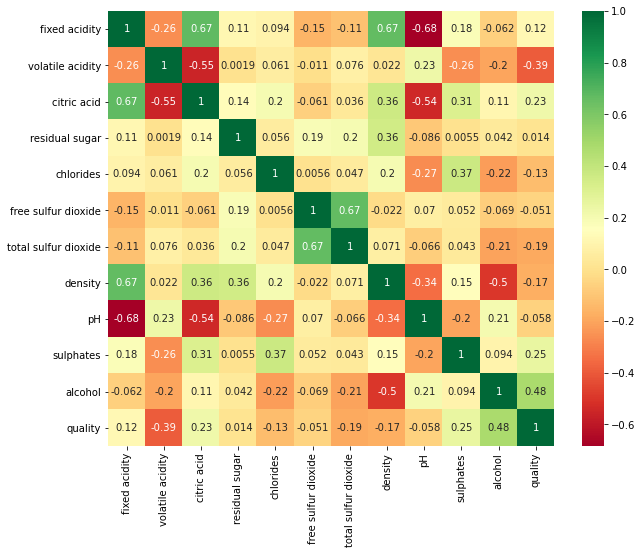

In [5]:
corr = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

### The correlation among the I/p features is not high enough to drop any feature

## Outliers

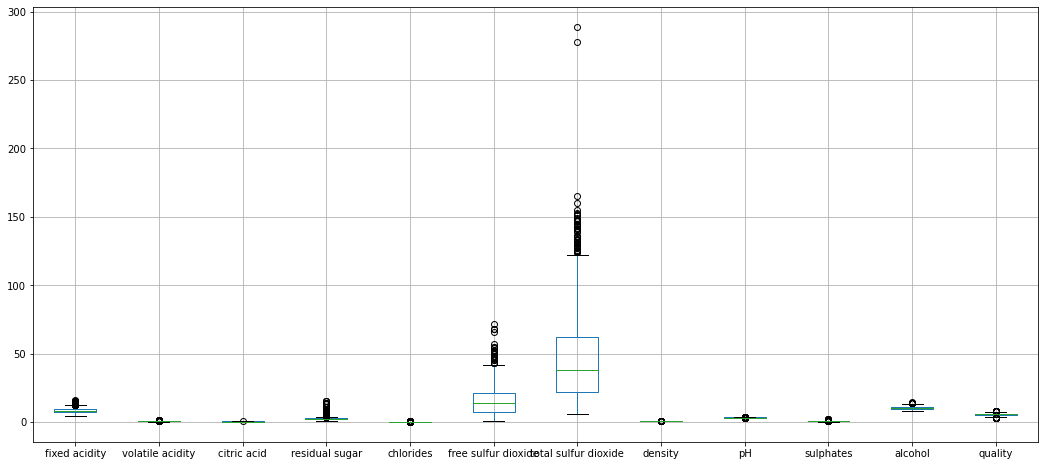

In [6]:
plt.figure(figsize=(18, 8))

data.boxplot()
plt.show()

## Features with outliers :

1) 'total sulfur dioxide'

2) 'free sulfur dioxide'

3) 'residual sugar'

## 1) total sulfur dioxide

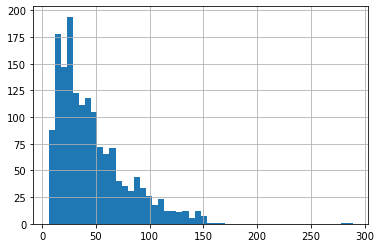

In [7]:
data['total sulfur dioxide'].hist(bins=50)
plt.show()

#### The feature 'K' follows a Skewed Distribution; hence we use *Inter-Quartile (IQR) method* to handle the outliers

In [8]:
def iqr_outliers(df, variable) :
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)

    iqr = q3 - q1

    lower_boundary = q1 - 1.5 * q1
    upper_boundary = q3 + 1.5 * q3
    
    df.loc[df[variable] >= upper_boundary, variable] = upper_boundary

    df.loc[df[variable] <= lower_boundary, variable] = lower_boundary

In [9]:
iqr_outliers(data, 'total sulfur dioxide')

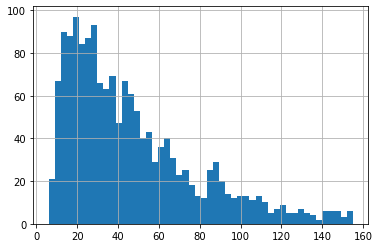

In [10]:
data['total sulfur dioxide'].hist(bins=50)
plt.show()

## 2) free sulfur dioxide

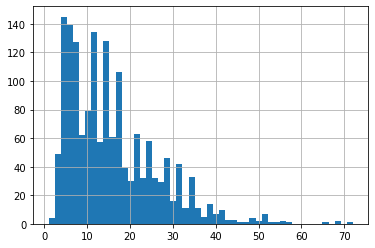

In [11]:
data['free sulfur dioxide'].hist(bins=50)
plt.show()

#### The feature 'K' follows a Skewed Distribution; hence we use *Inter-Quartile (IQR) method* to handle the outliers

In [12]:
iqr_outliers(data, 'free sulfur dioxide')

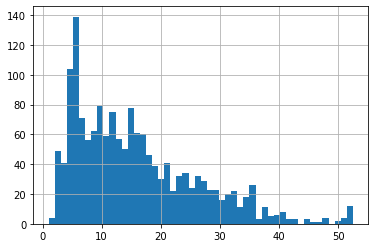

In [13]:
data['free sulfur dioxide'].hist(bins=50)
plt.show()

## 3) residual sugar

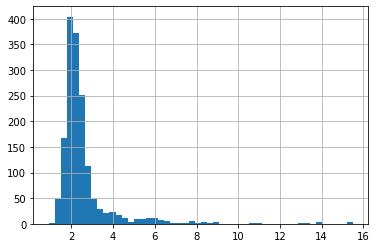

In [14]:
data['residual sugar'].hist(bins=50)
plt.show()

#### The feature 'K' follows a Skewed Distribution; hence we use *Inter-Quartile (IQR) method* to handle the outliers

In [15]:
iqr_outliers(data, 'residual sugar')

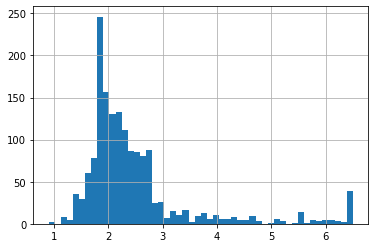

In [16]:
data['residual sugar'].hist(bins=50)
plt.show()

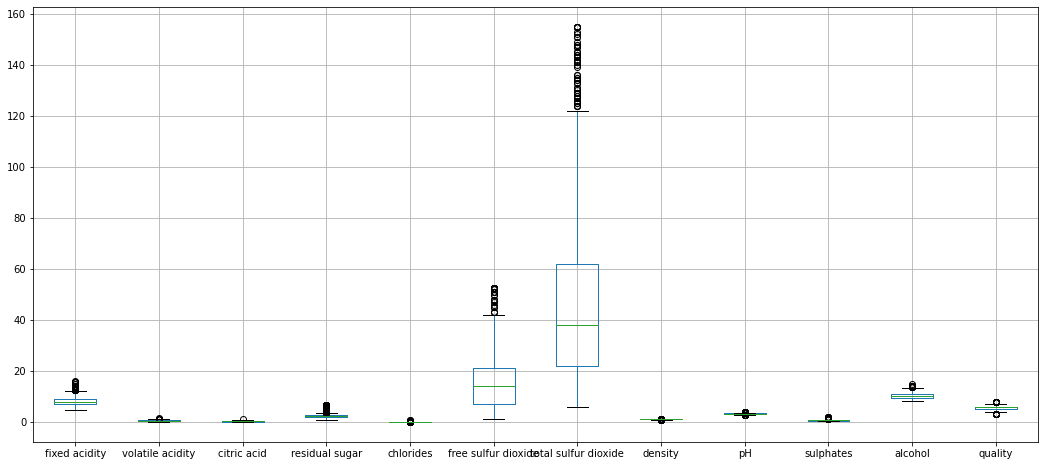

In [17]:
plt.figure(figsize=(18, 8))

data.boxplot()
plt.show()

## X & y Split

In [18]:
X = data.copy()
X.drop(['quality'], axis=1, inplace=True)

In [19]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
y = data['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [21]:
# Total 6 different O/p values
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Feature Scaling : Standardizing

In [22]:
sc = StandardScaler()

In [23]:
X = sc.fit_transform(X)

In [24]:
X_cols = data.copy()
X_cols.drop(['quality'], axis=1, inplace=True)

In [25]:
X = pd.DataFrame(X, columns=X_cols.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.550602,-0.243707,-0.470663,-0.384358,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.122607,0.223875,0.894225,0.647041,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.165911,0.096353,-0.080695,0.240732,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.550602,-0.264960,0.114289,0.428259,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.550602,-0.243707,-0.470663,-0.384358,0.558274,1.288643,-0.579207,-0.960246


# Part 1

## Clustering

In [26]:
# We know there are 6 different O/p values
kmeans = KMeans(n_clusters=6)

In [27]:
kmeans.fit(X)

KMeans(n_clusters=6)

In [28]:
clusters = kmeans.predict(X)
clusters

array([1, 1, 1, ..., 2, 2, 3])

## Reducing the dimensions using PCA to visualize them

In [45]:
pca = PCA(n_components=2)

In [30]:
reduced_X = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])
reduced_X

,PC1,PC2
0,-1.633941,0.484850
1,-0.794358,1.943157
2,-0.750529,0.943049
3,2.332372,-0.243086
4,-1.633941,0.484850
...,...,...
1594,-2.173785,0.797348
1595,-2.230147,0.862695
1596,-1.462591,0.289361
1597,-2.293238,0.972599


In [31]:
reduced_X['clusters'] = clusters
reduced_X

,PC1,PC2,clusters
0,-1.633941,0.484850,1
1,-0.794358,1.943157,1
2,-0.750529,0.943049,1
3,2.332372,-0.243086,5
4,-1.633941,0.484850,1
...,...,...,...
1594,-2.173785,0.797348,2
1595,-2.230147,0.862695,2
1596,-1.462591,0.289361,2
1597,-2.293238,0.972599,2


In [32]:
# Cluster centers(centroids) for the actual data
kmeans.cluster_centers_

array([[ 9.54162998e-02,  2.19980305e-03,  1.18155266e+00,
        -4.64733203e-01,  5.78475973e+00, -4.58760199e-02,
         5.29836539e-01,  1.80071833e-01, -1.73579154e+00,
         3.66341219e+00, -8.69731260e-01],
       [-3.99229171e-01,  6.12154593e-01, -7.40106068e-01,
        -2.43388770e-01, -4.74078040e-02, -4.74716839e-01,
        -3.90222352e-01,  1.09046133e-02,  2.88177208e-01,
        -4.06847245e-01, -5.36693598e-01],
       [-1.10848805e+00,  4.35028958e-01, -9.49331632e-01,
        -2.75893224e-01, -4.17551233e-01,  3.22772248e-01,
        -1.47304790e-01, -1.32218695e+00,  1.22451468e+00,
        -1.35549236e-01,  1.17976671e+00],
       [ 6.90622805e-02, -1.03277915e+00,  7.12693142e-01,
        -1.94462478e-01, -2.72432420e-01, -2.81390979e-01,
        -5.17800526e-01, -6.45871104e-01, -1.43884977e-01,
         4.26090464e-01,  9.58899132e-01],
       [-1.00653614e-01,  6.30583281e-02,  7.60698758e-02,
         4.00438426e-01,  1.39480830e-02,  1.13054357e+00,
  

In [33]:
# Cluster centers(centroids) for the reduced data
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[ 3.5588667 ,  1.1805619 ],
       [-0.88095739,  0.04563067],
       [-2.45339687, -0.46136825],
       [ 0.32848975, -1.50557885],
       [ 0.21370984,  1.76377139],
       [ 2.59401131, -0.70674947]])

## Visualizing the Clusters along with their centroids

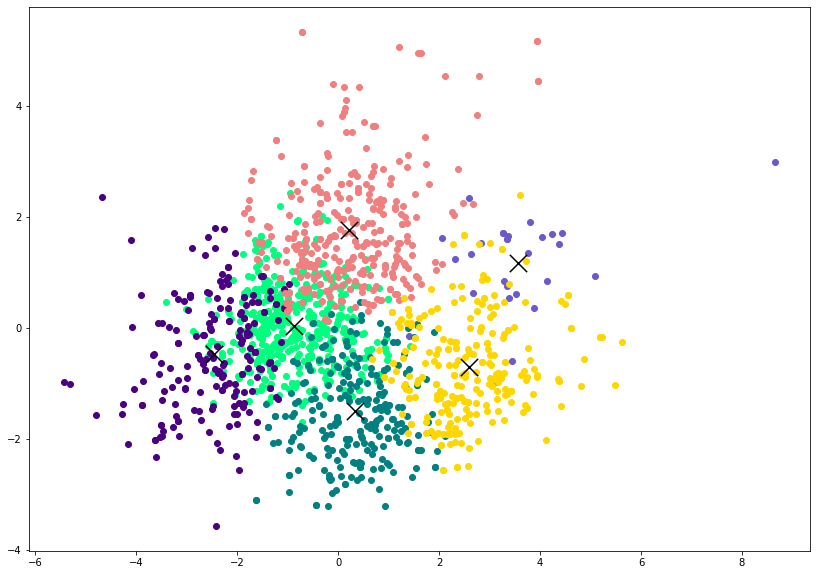

In [34]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_X[reduced_X['clusters'] == 0].loc[:, 'PC1'], reduced_X[reduced_X['clusters'] == 0].loc[:, 'PC2'], color='slateblue')
plt.scatter(reduced_X[reduced_X['clusters'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['clusters'] == 1].loc[:, 'PC2'], color='springgreen')
plt.scatter(reduced_X[reduced_X['clusters'] == 2].loc[:, 'PC1'], reduced_X[reduced_X['clusters'] == 2].loc[:, 'PC2'], color='indigo')
plt.scatter(reduced_X[reduced_X['clusters'] == 3].loc[:, 'PC1'], reduced_X[reduced_X['clusters'] == 3].loc[:, 'PC2'], color='teal')
plt.scatter(reduced_X[reduced_X['clusters'] == 4].loc[:, 'PC1'], reduced_X[reduced_X['clusters'] == 4].loc[:, 'PC2'], color='lightcoral')
plt.scatter(reduced_X[reduced_X['clusters'] == 5].loc[:, 'PC1'], reduced_X[reduced_X['clusters'] == 5].loc[:, 'PC2'], color='gold')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.show()

# Part 2

## Classification

## Train - Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Random Forest Model

In [36]:
rf = RandomForestClassifier()

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
print('Random Forest Model Accuracy : ', rf.score(X_test, y_test))

Random Forest Model Accuracy :  0.6477272727272727


## XGBoost Model

In [39]:
xgboost = XGBClassifier()

In [40]:
xgboost.fit(X_train, y_train)

[12:07:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
print('XGBoost Model Accuracy : ', xgboost.score(X_test, y_test))

XGBoost Model Accuracy :  0.6401515151515151
